# **APRENDIZAJE NO SUPERVIZADO**

# **K-MEANS**

In [ ]:
# Generación de datos de muestra
from sklearn.datasets import make_blobs
# Para entender K-means, generamos datos distribuidos en clusters para verlo en acción.
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualización de los datos
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=30)
plt.title("Datos de Muestra")
plt.show()

In [ ]:
# Importación de librerías necesarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Implementación de K-means
kmeans = KMeans(n_clusters=4,  # (((SUPOSISCION)))) Número de clusters que queremos identificar
                init='k-means++',  # Método de inicialización para los centros de clusters
                max_iter=300,  # Máximas iteraciones para la convergencia
                n_init=10,  # Número de inicializaciones diferentes para asegurar buenos resultados
                random_state=0)  # Fijamos el estado aleatorio para reproducibilidad

# Ajuste del modelo a los datos
kmeans.fit(X_scaled)

kmeans.labels_ #Entrega un array de las etiquetas
kmeans.cluster_centers_ #Entrega un array con los centros de los clusters

# Predicción de clusters
y_kmeans = kmeans.predict(X_scaled)

# Visualización de los resultados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroides')
plt.title("Clusters Encontrados con K-means")
plt.legend()
plt.show()


Explicación Paso a Paso

1.- Instanciación de K-means: Creamos una instancia del modelo KMeans con parámetros clave:

- n_clusters: Número de clusters que queremos encontrar (aquí, 4).
- init: Método de inicialización de centroides, k-means++ ayuda a elegir puntos iniciales alejados entre sí para converger rápidamente.
- max_iter: Número máximo de iteraciones que K-means ejecutará en caso de no converger antes.
- n_init: Número de veces que el algoritmo se ejecutará con diferentes inicializaciones; se quedará con el mejor resultado.

2.- Ajuste del modelo: Ejecutamos fit para aplicar el modelo a nuestros datos y hallar los clusters.

3.- Visualización de resultados: Ploteamos los puntos de datos y usamos predict para asignar cada punto a un cluster. Finalmente, visualizamos los centroides en rojo.


Metodo del Codo


In [ ]:
# Aplicación del método del codo
inercia = []  # Lista para almacenar la inercia para cada número de clusters

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)  # La inercia mide qué tan cerca están los puntos de los centroides

# Visualización del método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inercia, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k')
plt.show()

# **Hierarchical Clusterging - Clustering Jerarquico**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Cálculo del clustering jerárquico usando el método de enlace
Z = linkage(X_scaled, method='ward')  # linkage calcula las distancias entre clusters en cada paso

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrograma para el Clustering Jerárquico")
plt.xlabel("Índice de muestras")
plt.ylabel("Distancia")
plt.show()

# Implementación del Clustering Jerárquico Aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=4,  # Número de clusters que queremos identificar
                                         affinity='euclidean',  # Métrica de distancia
                                         linkage='ward')  # Método de enlace para combinar clusters

# Ajuste del modelo a los datos
y_agg = agg_clustering.fit_predict(X_scaled)

# Visualización de los clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_agg, s=30, cmap='viridis')
plt.title("Clusters Encontrados con Clustering Jerárquico")
plt.show()


1.- Dendrograma:

- Usamos linkage para calcular la distancia entre puntos y unir clusters con el método de enlace especificado (aquí, ward).

- method='ward': Este método minimiza la varianza dentro de los clusters y tiende a producir clusters esféricos. Otras opciones son single (mínima distancia), complete (máxima distancia), y average (media de todas las distancias).

- Dendrograma: Visualizamos el dendrograma para ver cómo se agrupan los datos y dónde podríamos cortar para formar clusters.

2.- Instanciación del modelo:

- n_clusters: Número de clusters que queremos formar.

- affinity='euclidean': Define la métrica de distancia. La más común es euclidean, pero puedes usar manhattan, cosine, etc.

- linkage='ward': Método de enlace usado para unir clusters (aquí ward por su efectividad con datos esféricos).

3.- Ajuste del modelo y visualización: Ejecutamos fit_predict para asignar cada punto a un cluster, y luego graficamos los clusters.

In [ ]:
print("Etiquetas de clusters asignadas (labels_):")
print(agg_clustering.labels_)  # Array con la etiqueta del cluster asignada a cada muestra

# Estructura de fusión de clusters
print("\nEstructura de fusión de clusters (children_):")
print(agg_clustering.children_)  # Matriz con los índices de los clusters combinados en cada paso

# Número total de hojas en el dendrograma (igual al número de muestras)
print("\nNúmero total de hojas (n_leaves_):")
print(agg_clustering.n_leaves_)  # Número de muestras en el conjunto de datos

# Número de clusters especificado en el modelo
print("\nNúmero de clusters formados (n_clusters_):")
print(agg_clustering.n_clusters_)  # Número final de clusters después del agrupamiento

# Número de componentes conectados en el gráfico de conectividad
print("\nNúmero de componentes conectados (n_components_):")
print(agg_clustering.n_components_)  # Número de componentes conectados en los datos

# Número de características (columnas) en el conjunto de datos de entrada
print("\nNúmero de características en los datos de entrada (n_features_in_):")
print(agg_clustering.n_features_in_)  # Cantidad de columnas en X

# Número de muestras (filas) en el conjunto de datos de entrada
print("\nNúmero de muestras en el conjunto de datos (n_samples_):")
print(agg_clustering.n_samples_)  # Cantidad de filas en X

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
density = DBSCAN(eps=30, min_samples=3, metric='euclidean')
y_density = density.fit_predict(df1)

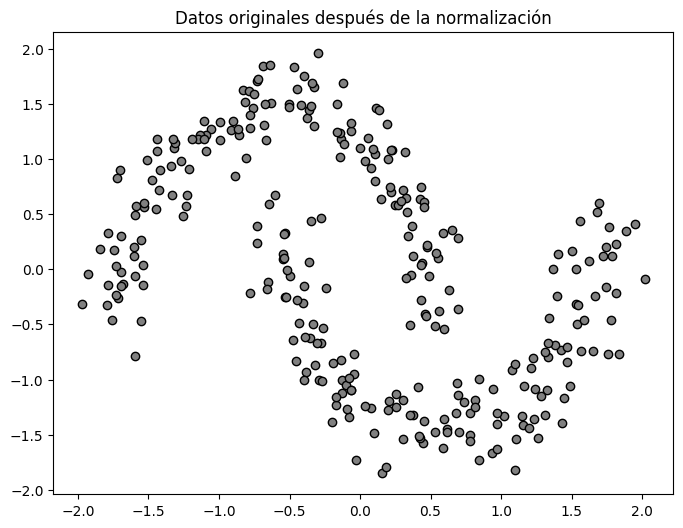

Número de clusters encontrados: 2
Número de puntos considerados como ruido: 3
Coeficiente de Silhouette (excluyendo el ruido): 0.38109346161803626


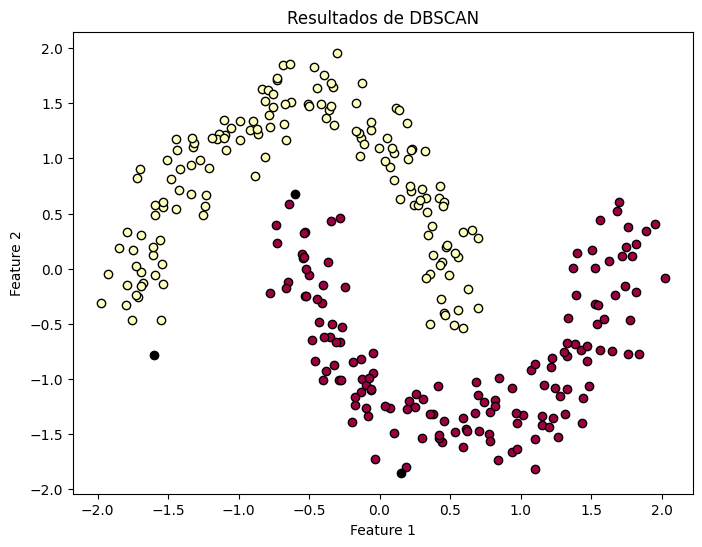

In [ ]:
# DBSCAN Example Notebook

# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Generar un conjunto de datos
# Utilizaremos el conjunto de datos "moons" que tiene una forma no lineal
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Escalado de características
# DBSCAN es sensible a las escalas, así que escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos generados
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', marker='o', edgecolor='k')
plt.title("Datos originales después de la normalización")
plt.show()

# Aplicar DBSCAN
# Configuración de los parámetros
eps = 0.3       # Radio de búsqueda para considerar un punto como vecino
min_samples = 6 # Número mínimo de puntos para formar un núcleo de densidad

# Crear el modelo DBSCAN y ajustarlo a los datos
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# Evaluar el modelo
# DBSCAN asigna -1 a los puntos considerados como ruido
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Número de clusters encontrados:", n_clusters)
print("Número de puntos considerados como ruido:", n_noise)

# Calcular el coeficiente de Silhouette
# Ignoramos los puntos etiquetados como ruido (-1)
silhouette_avg = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
print("Coeficiente de Silhouette (excluyendo el ruido):", silhouette_avg)

# Visualizar los resultados
# Etiquetas de los clusters en diferentes colores y ruido en color gris
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color del ruido
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("Resultados de DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Explicación de los pasos del notebook

1. **Generación del conjunto de datos**: usamos `make_moons` para crear datos con una forma no lineal, ideal para DBSCAN.
  
2. **Escalado de datos**: escalamos los datos usando `StandardScaler` porque DBSCAN es sensible a la escala de las características.

3. **Aplicación de DBSCAN**:
   - **`eps`**: define el radio de búsqueda para vecinos de un punto.
   - **`min_samples`**: número mínimo de puntos necesarios para considerar un punto como núcleo de un clúster.
   
4. **Evaluación de DBSCAN**:
   - **Número de clústeres** y **ruido**.
   - **Coeficiente de Silhouette** (ignora puntos de ruido) para evaluar la cohesión de los clústeres.

5. **Visualización de resultados**: los puntos se colorean según el clúster asignado, y el ruido se muestra en color gris.

Con este notebook, puedes explorar y ajustar parámetros para mejorar el rendimiento de DBSCAN según tus datos.